
# Delhivery

Delhivery is the largest and fastest-growing fully integrated player in India by revenue in Fiscal 2021. They aim to build the operating system for commerce, through a combination of world-class infrastructure, logistics operations of the highest quality, and cutting-edge engineering and technology capabilities.

The Data team builds intelligence and capabilities using this data that helps them to widen the gap between the quality, efficiency, and profitability of their business versus their competitors.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/delhivery_data.csv')

In [ ]:
df.head()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:27:55,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:17:55,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:01:19.505586,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:39:57,36.118028,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:33:55,39.386040,68.0,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000


In [ ]:
df.shape

(144867, 24)

In [ ]:
df.dtypes

data                               object
trip_creation_time                 object
route_schedule_uuid                object
route_type                         object
trip_uuid                          object
source_center                      object
source_name                        object
destination_center                 object
destination_name                   object
od_start_time                      object
od_end_time                        object
start_scan_to_end_scan            float64
is_cutoff                            bool
cutoff_factor                       int64
cutoff_timestamp                   object
actual_distance_to_destination    float64
actual_time                       float64
osrm_time                         float64
osrm_distance                     float64
factor                            float64
segment_actual_time               float64
segment_osrm_time                 float64
segment_osrm_distance             float64
segment_factor                    

In [ ]:
df['trip_creation_time'] = pd.to_datetime(df['trip_creation_time'])
df['od_start_time'] = pd.to_datetime(df['od_start_time'])
df['od_end_time'] = pd.to_datetime(df['od_end_time'])

In [ ]:
df.head()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:27:55,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:17:55,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:01:19.505586,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:39:57,36.118028,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:33:55,39.386040,68.0,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   data                            144867 non-null  object        
 1   trip_creation_time              144867 non-null  datetime64[ns]
 2   route_schedule_uuid             144867 non-null  object        
 3   route_type                      144867 non-null  object        
 4   trip_uuid                       144867 non-null  object        
 5   source_center                   144867 non-null  object        
 6   source_name                     144574 non-null  object        
 7   destination_center              144867 non-null  object        
 8   destination_name                144606 non-null  object        
 9   od_start_time                   144867 non-null  datetime64[ns]
 10  od_end_time                     144867 non-null  datetim

In [ ]:
df.isna().sum()

data                                0
trip_creation_time                  0
route_schedule_uuid                 0
route_type                          0
trip_uuid                           0
source_center                       0
source_name                       293
destination_center                  0
destination_name                  261
od_start_time                       0
od_end_time                         0
start_scan_to_end_scan              0
is_cutoff                           0
cutoff_factor                       0
cutoff_timestamp                    0
actual_distance_to_destination      0
actual_time                         0
osrm_time                           0
osrm_distance                       0
factor                              0
segment_actual_time                 0
segment_osrm_time                   0
segment_osrm_distance               0
segment_factor                      0
dtype: int64

In [ ]:
df[df.isna().any(axis=1)]


,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
110,training,2018-09-25 08:53:04.377810,thanos::sroute:4460a38d-ab9b-484e-bd4e-f4201d0...,FTL,trip-153786558437756691,IND342601AAA,Piparcity_BsstdDPP_D (Rajasthan),IND342902A1B,NaN,2018-09-26 05:04:49.254901,...,2018-09-26 05:57:25,24.538214,58.0,33.0,30.8845,1.757576,58.0,33.0,30.8845,1.757576
111,training,2018-09-25 08:53:04.377810,thanos::sroute:4460a38d-ab9b-484e-bd4e-f4201d0...,FTL,trip-153786558437756691,IND342601AAA,Piparcity_BsstdDPP_D (Rajasthan),IND342902A1B,NaN,2018-09-26 05:04:49.254901,...,2018-09-26 05:04:49.254901,34.657709,110.0,43.0,41.5361,2.558140,52.0,10.0,10.6517,5.200000
112,training,2018-09-25 08:53:04.377810,thanos::sroute:4460a38d-ab9b-484e-bd4e-f4201d0...,FTL,trip-153786558437756691,IND342902A1B,NaN,IND302014AAA,Jaipur_Hub (Rajasthan),2018-09-26 06:58:08.054001,...,2018-09-26 14:09:19,22.783440,48.0,34.0,37.7749,1.411765,48.0,34.0,37.7749,1.411765
113,training,2018-09-25 08:53:04.377810,thanos::sroute:4460a38d-ab9b-484e-bd4e-f4201d0...,FTL,trip-153786558437756691,IND342902A1B,NaN,IND302014AAA,Jaipur_Hub (Rajasthan),2018-09-26 06:58:08.054001,...,2018-09-26 13:19:23,46.071250,98.0,41.0,56.3575,2.390244,49.0,33.0,34.1661,1.484848
114,training,2018-09-25 08:53:04.377810,thanos::sroute:4460a38d-ab9b-484e-bd4e-f4201d0...,FTL,trip-153786558437756691,IND342902A1B,NaN,IND302014AAA,Jaipur_Hub (Rajasthan),2018-09-26 06:58:08.054001,...,2018-09-26 12:49:33,67.714993,127.0,58.0,80.4811,2.189655,29.0,17.0,24.1236,1.705882
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144484,test,2018-10-03 09:06:06.690094,thanos::sroute:cbef3b6a-79ea-4d5e-a215-b558a70...,FTL,trip-153855756668984584,IND282002AAD,NaN,IND474003AAA,Gwalior_HrihrNgr_I (Madhya Pradesh),2018-10-03 17:34:21.835475,...,2018-10-03 20:54:08,45.134384,62.0,45.0,47.7734,1.377778,34.0,23.0,23.6601,1.478261
144485,test,2018-10-03 09:06:06.690094,thanos::sroute:cbef3b6a-79ea-4d5e-a215-b558a70...,FTL,trip-153855756668984584,IND282002AAD,NaN,IND474003AAA,Gwalior_HrihrNgr_I (Madhya Pradesh),2018-10-03 17:34:21.835475,...,2018-10-03 20:30:09,66.542266,86.0,71.0,71.9549,1.211268,23.0,25.0,24.1815,0.920000
144486,test,2018-10-03 09:06:06.690094,thanos::sroute:cbef3b6a-79ea-4d5e-a215-b558a70...,FTL,trip-153855756668984584,IND282002AAD,NaN,IND474003AAA,Gwalior_HrihrNgr_I (Madhya Pradesh),2018-10-03 17:34:21.835475,...,2018-10-03 20:00:08,88.143957,116.0,114.0,112.6943,1.017544,30.0,43.0,40.7394,0.697674
144487,test,2018-10-03 09:06:06.690094,thanos::sroute:cbef3b6a-79ea-4d5e-a215-b558a70...,FTL,trip-153855756668984584,IND282002AAD,NaN,IND474003AAA,Gwalior_HrihrNgr_I (Madhya Pradesh),2018-10-03 17:34:21.835475,...,2018-10-03 19:02:11,111.084417,173.0,123.0,134.1940,1.406504,57.0,45.0,46.9217,1.266667


 > We need to drop the last row of the DataFrame due to missing values present in most columns, in order to proceed with further analysis.












In [ ]:
df['source_name'].fillna('Unknown', inplace=True)
df['destination_name'].fillna('Unknown', inplace=True)

In [ ]:
df.isna().sum()

data                              0
trip_creation_time                0
route_schedule_uuid               0
route_type                        0
trip_uuid                         0
source_center                     0
source_name                       0
destination_center                0
destination_name                  0
od_start_time                     0
od_end_time                       0
start_scan_to_end_scan            0
is_cutoff                         0
cutoff_factor                     0
cutoff_timestamp                  0
actual_distance_to_destination    0
actual_time                       0
osrm_time                         0
osrm_distance                     0
factor                            0
segment_actual_time               0
segment_osrm_time                 0
segment_osrm_distance             0
segment_factor                    0
dtype: int64

**Merging the rows**



> Create a unique identifier for different segments of a trip based on the
combination of the trip_uuid, source_center, and destination_center and
name it as segment_key.



In [ ]:
df['segment_key'] = df['trip_uuid'] + '_' + df['source_center'] + '_' + df['destination_center']

In [ ]:
df['segment_actual_time_sum'] = df.groupby('segment_key')['segment_actual_time'].cumsum()
df['segment_osrm_distance_sum'] = df.groupby('segment_key')['segment_osrm_distance'].cumsum()
df['segment_osrm_time_sum'] = df.groupby('segment_key')['segment_osrm_time'].cumsum()

In [ ]:
df.head()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor,segment_key,segment_actual_time_sum,segment_osrm_distance_sum,segment_osrm_time_sum
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,11.9653,1.272727,14.0,11.0,11.9653,1.272727,trip-153741093647649320_IND388121AAA_IND388620AAB,14.0,11.9653,11.0
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,21.7243,1.200000,10.0,9.0,9.7590,1.111111,trip-153741093647649320_IND388121AAA_IND388620AAB,24.0,21.7243,20.0
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,32.5395,1.428571,16.0,7.0,10.8152,2.285714,trip-153741093647649320_IND388121AAA_IND388620AAB,40.0,32.5395,27.0
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,45.5620,1.550000,21.0,12.0,13.0224,1.750000,trip-153741093647649320_IND388121AAA_IND388620AAB,61.0,45.5619,39.0
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,54.2181,1.545455,6.0,5.0,3.9153,1.200000,trip-153741093647649320_IND388121AAA_IND388620AAB,67.0,49.4772,44.0


In [ ]:
create_segment_dict = {
    'trip_uuid': 'first',
    'source_center': 'first',
    'destination_center': 'first',
    'segment_actual_time': 'sum',
    'segment_osrm_distance': 'sum',
    'segment_osrm_time': 'sum',
    'od_end_time': ['first', 'last']
}

In [ ]:
agg_df = df.groupby('segment_key').agg(create_segment_dict)

In [ ]:
agg_df.columns = ['_'.join(col).strip() if isinstance(col, tuple) else col for col in agg_df.columns.values]

agg_df = agg_df.rename(columns={
    'trip_uuid_first': 'trip_uuid',
    'source_center_first': 'source_center',
    'destination_center_first': 'destination_center',
    'segment_actual_time_sum': 'segment_actual_time_sum',
    'segment_osrm_distance_sum': 'segment_osrm_distance_sum',
    'segment_osrm_time_sum': 'segment_osrm_time_sum',
    'od_end_time_first': 'od_end_time_first',
    'od_end_time_last': 'od_end_time_last'
})



In [ ]:
sorted_df = agg_df.sort_values(by=['segment_key', 'od_end_time_first'])


In [ ]:
sorted_df = agg_df.sort_values(by=['segment_key', 'od_end_time_first'])


sorted_df = sorted_df.reset_index()

In [ ]:
sorted_df.head()

,segment_key,trip_uuid,source_center,destination_center,segment_actual_time_sum,segment_osrm_distance_sum,segment_osrm_time_sum,od_end_time_first,od_end_time_last
0,trip-153671041653548748_IND209304AAA_IND000000ACB,trip-153671041653548748,IND209304AAA,IND000000ACB,728.0,670.6205,534.0,2018-09-13 13:40:23.123744,2018-09-13 13:40:23.123744
1,trip-153671041653548748_IND462022AAA_IND209304AAA,trip-153671041653548748,IND462022AAA,IND209304AAA,820.0,649.8528,474.0,2018-09-12 16:39:46.858469,2018-09-12 16:39:46.858469
2,trip-153671042288605164_IND561203AAB_IND562101AAA,trip-153671042288605164,IND561203AAB,IND562101AAA,46.0,28.1995,26.0,2018-09-12 03:01:59.598855,2018-09-12 03:01:59.598855
3,trip-153671042288605164_IND572101AAA_IND561203AAB,trip-153671042288605164,IND572101AAA,IND561203AAB,95.0,55.9899,39.0,2018-09-12 02:03:09.655591,2018-09-12 02:03:09.655591
4,trip-153671043369099517_IND000000ACB_IND160002AAC,trip-153671043369099517,IND000000ACB,IND160002AAC,608.0,317.7408,231.0,2018-09-14 17:34:55.442454,2018-09-14 17:34:55.442454


##Feature Engineering:

- Calculate time taken between od_start_time and od_end_time and keep it as a
feature named od_time_diff_hour. Drop the original columns, if required.

In [ ]:
df['od_time_diff_hour'] = (df['od_end_time'] - df['od_start_time']).dt.total_seconds() / 3600
df.drop(['od_start_time', 'od_end_time'], axis=1, inplace=True)

- Destination Name: Split and extract features out of destination. City-place-code
(State):

In [ ]:
df['destination place'] = df['destination_name'].str.extract(r'^(.*?) \(', expand=False)
df['destination state'] = df['destination_name'].str.extract(r'\((.*?)\)', expand=False)


In [ ]:
df['source place'] = df['source_name'].str.extract(r'^(.*?) \(', expand=False)
df['source state'] = df['source_name'].str.extract(r'\((.*?)\)', expand=False)

In [ ]:
df.drop(['source_name', 'destination_name'], axis=1, inplace=True)

In [ ]:
df['trip_creation_month'] = pd.to_datetime(df['trip_creation_time']).dt.month
df['trip_creation_year'] = pd.to_datetime(df['trip_creation_time']).dt.year
df['trip_creation_day'] = pd.to_datetime(df['trip_creation_time']).dt.day

- ### Outlier detection

In [ ]:
numerical_columns = ['segment_actual_time', 'segment_osrm_distance', 'segment_osrm_time']

In [ ]:
Q1 = df[numerical_columns].quantile(0.25)
Q3 = df[numerical_columns].quantile(0.75)
IQR = Q3 - Q1

In [ ]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [ ]:
outliers = ((df[numerical_columns] < lower_bound) | (df[numerical_columns] > upper_bound)).any(axis=1)

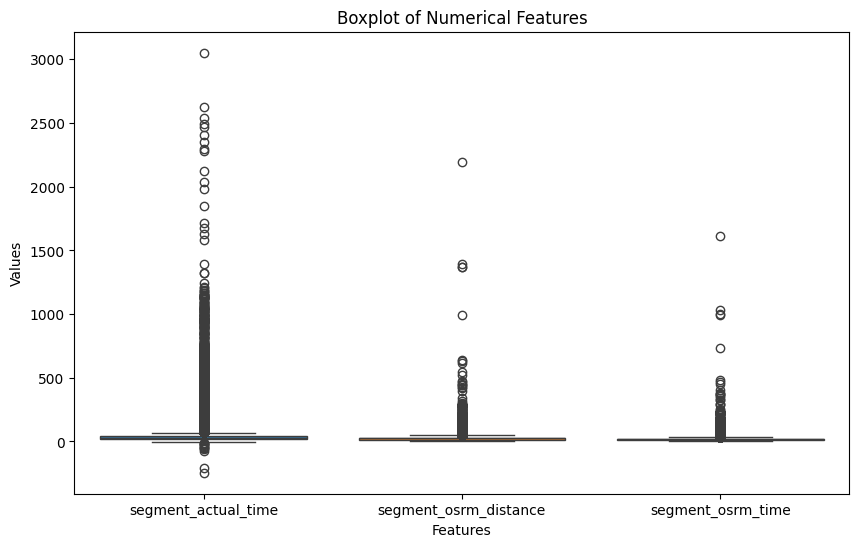

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[numerical_columns])
plt.title('Boxplot of Numerical Features')
plt.xlabel('Features')
plt.ylabel('Values')
plt.show()

- Handling outlier using IQR

In [ ]:

df_no_outliers = df[~outliers]

df_no_outliers.shape

(131081, 32)

- one-hot Encoding on categorical Features

In [ ]:
# One-hot encode categorical features
df_encoded = pd.get_dummies(df, columns=['route_type'])

# Normalize/Standardize numerical features
scaler = StandardScaler()
df_no_outliers[numerical_columns] = scaler.fit_transform(df_no_outliers[numerical_columns])

print(df_no_outliers.head())

df_no_outliers.columns


       data         trip_creation_time  \
0  training 2018-09-20 02:35:36.476840   
1  training 2018-09-20 02:35:36.476840   
2  training 2018-09-20 02:35:36.476840   
3  training 2018-09-20 02:35:36.476840   
4  training 2018-09-20 02:35:36.476840   

                                 route_schedule_uuid route_type  \
0  thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...    Carting   
1  thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...    Carting   
2  thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...    Carting   
3  thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...    Carting   
4  thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...    Carting   

                 trip_uuid source_center destination_center  \
0  trip-153741093647649320  IND388121AAA       IND388620AAB   
1  trip-153741093647649320  IND388121AAA       IND388620AAB   
2  trip-153741093647649320  IND388121AAA       IND388620AAB   
3  trip-153741093647649320  IND388121AAA       IND388620AAB   
4  trip-153741093647649320  I

<ipython-input-81-a104fb36ece5>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_outliers[numerical_columns] = scaler.fit_transform(df_no_outliers[numerical_columns])


Index(['data', 'trip_creation_time', 'route_schedule_uuid', 'route_type',
       'trip_uuid', 'source_center', 'destination_center',
       'start_scan_to_end_scan', 'is_cutoff', 'cutoff_factor',
       'cutoff_timestamp', 'actual_distance_to_destination', 'actual_time',
       'osrm_time', 'osrm_distance', 'factor', 'segment_actual_time',
       'segment_osrm_time', 'segment_osrm_distance', 'segment_factor',
       'segment_key', 'segment_actual_time_sum', 'segment_osrm_distance_sum',
       'segment_osrm_time_sum', 'od_time_diff_hour', 'destination place',
       'destination state', 'source place', 'source state',
       'trip_creation_month', 'trip_creation_year', 'trip_creation_day'],
      dtype='object')

- ## Hypothesis Testing

In [ ]:
from scipy import stats

### actual_time vs osrm_time


- null hypothesis: There is no sofgnificant diffrence between the actual_time and osrm _time
- Alternatice Hypothesis: There is a significant diffrence between the actual_time and osrm_time

In [ ]:

alpha = 0.05


t_stat, p_val = stats.ttest_ind(df_no_outliers['actual_time'], df_no_outliers['osrm_time'])

print(t_stat , p_val)

if p_val < alpha:
    print("Reject the null hypothesis. There is a significant difference between actual_time and osrm_time.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference between actual_time and osrm_time.")


105.3439136044092 0.0
Reject the null hypothesis. There is a significant difference between actual_time and osrm_time.


### actual_time vs segment_actual_time


- null hypothesis:There is no significant difference between the actual_time and segment_actual_time.
- Alternatice Hypothesis: There is a significant difference between the actual_time and segment_actual_time.

In [ ]:

t_stat, p_val = stats.ttest_ind(df_no_outliers['actual_time'], df_no_outliers['segment_actual_time_sum'])

print(t_stat , p_val)

if p_val < alpha:
    print("Reject the null hypothesis. There is a significant difference between aggregated actual_time and segmented_actual_time.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference between aggregated actual_time and segmented_actual_time.")

1.7822081655843258 0.07471644873370588
Fail to reject the null hypothesis. There is no significant difference between aggregated actual_time and segmented_actual_time.


### osrm_distance vs segment_osrm_distance


- null hypothesis: There is no significant difference between the osrm_distance and segment_osrm_distance.
- Alternatice Hypothesis: There is a significant difference between the osrm_distance and segment_osrm_distance.

In [ ]:
t_stat, p_val = stats.ttest_ind(df_no_outliers['segment_osrm_distance_sum'], df_no_outliers['segment_osrm_distance_sum'])

print(t_stat , p_val)


if p_val < alpha:
    print("Reject the null hypothesis. There is a significant difference between osrm_distance and segment_osrm_distance.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference between osrm_distance and segment_osrm_distance.")

0.0 1.0
Fail to reject the null hypothesis. There is no significant difference between osrm_distance and segment_osrm_distance.


### osrm_time vs segment_osrm_time


- null hypothesis: There is no significant difference between the osrm_time and segment_osrm_time.
- Alternatice Hypothesis: There is a significant difference between the osrm_time and segment_osrm_time.

In [ ]:
# Perform t-test
t_stat, p_val = stats.ttest_ind(df_no_outliers['segment_osrm_time_sum'], df_no_outliers['segment_osrm_time_sum'])

print(t_stat , p_val)

# Compare p-value with alpha
if p_val < alpha:
    print("Reject the null hypothesis. There is a significant difference between osrm_time and segment_osrm_time.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference between osrm_time and segment_osrm_time.")


0.0 1.0
Fail to reject the null hypothesis. There is no significant difference between osrm_time and segment_osrm_time.


In [ ]:
df_no_outliers.head()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,destination_center,start_scan_to_end_scan,is_cutoff,cutoff_factor,...,segment_osrm_distance_sum,segment_osrm_time_sum,od_time_diff_hour,destination place,destination state,source place,source state,trip_creation_month,trip_creation_year,trip_creation_day
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,IND388620AAB,86.0,True,9,...,11.9653,11.0,1.436894,Khambhat_MotvdDPP_D,Gujarat,Anand_VUNagar_DC,Gujarat,9,2018,20
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,IND388620AAB,86.0,True,18,...,21.7243,20.0,1.436894,Khambhat_MotvdDPP_D,Gujarat,Anand_VUNagar_DC,Gujarat,9,2018,20
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,IND388620AAB,86.0,True,27,...,32.5395,27.0,1.436894,Khambhat_MotvdDPP_D,Gujarat,Anand_VUNagar_DC,Gujarat,9,2018,20
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,IND388620AAB,86.0,True,36,...,45.5619,39.0,1.436894,Khambhat_MotvdDPP_D,Gujarat,Anand_VUNagar_DC,Gujarat,9,2018,20
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,IND388620AAB,86.0,False,39,...,49.4772,44.0,1.436894,Khambhat_MotvdDPP_D,Gujarat,Anand_VUNagar_DC,Gujarat,9,2018,20


In [ ]:
state_orders = df_no_outliers['source state'].value_counts()
corridor_orders = df_no_outliers.groupby(['source_center', 'destination_center']).size()


busiest_corridors = corridor_orders.nlargest(10)
avg_distance_time = df_no_outliers.groupby(['source_center', 'destination_center'])[['actual_distance_to_destination', 'actual_time']].mean()



In [ ]:
resource_allocation = df_no_outliers['source_center'].value_counts()

growth_opportunities = state_orders[state_orders > 1000]


delivery_performance = df_no_outliers.groupby(['source state', 'destination state'])['actual_time'].mean()




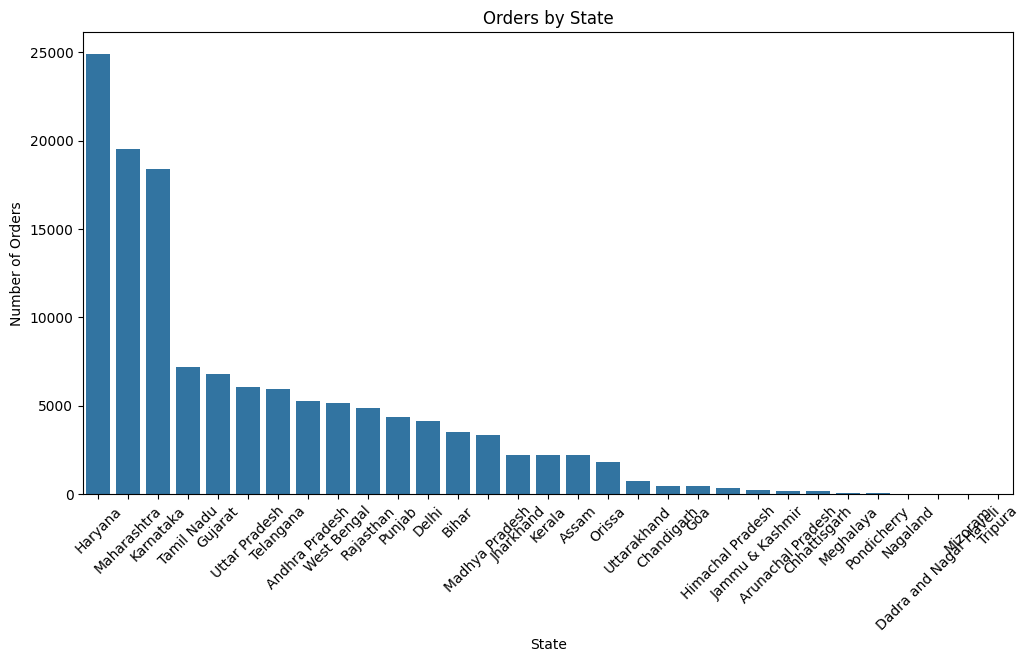

In [ ]:

plt.figure(figsize=(12, 6))
sns.barplot(x=state_orders.index, y=state_orders.values)
plt.title('Orders by State')
plt.xlabel('State')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.show()


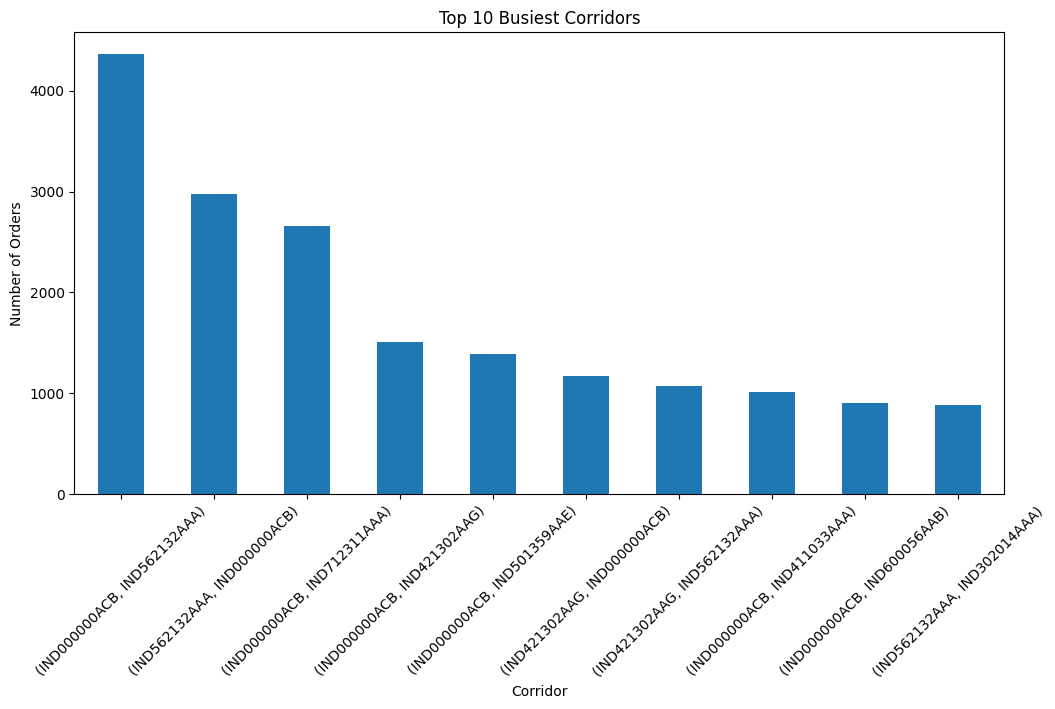

In [ ]:

plt.figure(figsize=(12, 6))
busiest_corridors.plot(kind='bar')
plt.title('Top 10 Busiest Corridors')
plt.xlabel('Corridor')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.show()
